In [4]:
import os
import time
from tqdm.notebook import tqdm
import itertools
import collections

import numpy as np
import pandas as pd
from matplotlib_venn import *
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [5]:
matplotlib.rcParams['figure.figsize'] = (8, 8)
sns.set_style('whitegrid')

---

__Рассмотрим задачу регрессии__

Пусть задана выборка X = $(x_{i}, y_{i})_{i=1}^n$ с вещественными ответами $y_{i} \in \mathbb{R}$. Будем считать, что на пространстве всех объектов и ответов $\mathbb{X} \times \mathbb{Y}$ существует распределение $p(x, y)$, из которого сгенерирована выборка X и ответы на ней.

Рассмотрим квадратичную функцию потерь 

$$
L(y, a(x)) = (y - a(x))^2
$$

и соответствующий ей среднеквадратический риск

$$
R(a) = \int\limits_{\mathbb{X}} \int\limits_{\mathbb{Y}} L(y, a(x)) \cdot p(x, y) \ dx\ dy = \mathbb{E}_{x, y} \left [  (y - a(x))^2\right ]
$$

Докажем, что $a^{\ast} = \underset{a \in \mathbb{A}}{\operatorname{argmin}} R(a)$ является условное матожидание $\mathbb{E}(y | x)$

__Доказательство__

$
\mathbb{E}_{x, y} \left [  (y - a(x))^2\right ] = \mathbb{E}_{x, y} \left [  (y - \mathbb{E}(y | x) + \mathbb{E}(y | x) - a(x))^2\right ] = 
\mathbb{E}_{x, y} \left [  (y - \mathbb{E}(y | x))^2 + 2 \cdot (y - \mathbb{E}(y | x))(\mathbb{E}(y | x) - a(x)) +(\mathbb{E}(y | x) - a(x))^2\right ] = 
\mathbb{E}_{x, y} \left[ (y - \mathbb{E}(y | x))^2 \right] + 2\cdot \underset{?}{\mathbb{E}_{x, y} \left[ (y - \mathbb{E}(y | x))(\mathbb{E}(y | x) - a(x)) \right]} + \mathbb{E}_{x} \left[ (a(x) - \mathbb{E}(y | x))^2 \right]
$

Рассмотрим ? = $\mathbb{E}_{x, y} \left[ (y - \mathbb{E}(y | x))(\mathbb{E}(y | x) - a(x)) \right]$, для его упрощения докажем следующй факт:


$\boxed{\mathbb{E}_{x, y} \left [  f(x, y)\right ] = \mathbb{E}_{x} \left[ \mathbb{E}_{y} \left[ f(x, y) | x  \right]   \right]}$

$
\mathbb{E}_{x, y} \left [  f(x, y)\right ] = \int\limits_{x} \int\limits_{y} f(x, y) \cdot \underbrace{p(x, y)}_{p(y | x) \cdot p(x)} \ dx \ dy = \int\limits_{x} \left\{ \int\limits_{y} f(x, y) \cdot p(y|x) \ dy  \right\} \cdot p(x) \ dx = \mathbb{E}_{x} \left[ \mathbb{E}_{y} \left[ f(x, y) | x  \right]   \right]$

Итак:

$
\mathbb{E}_{x, y} \left[ (y - \mathbb{E}(y | x))(\mathbb{E}(y | x) - a(x)) \right] =
\mathbb{E}_{x} \left[ \mathbb{E}_{y} \left[ (y - \mathbb{E}(y | x))(\mathbb{E}(y | x) - a(x)) | x \right]   \right]
$

__Доказательство__

$
\mathbb{E}_{x, y} \left [  (y - a(x))^2\right ] = \mathbb{E}_{x, y} \left [  (y - \mathbb{E}(y | x) + \mathbb{E}(y | x) - a(x))^2\right ] = 
\mathbb{E}_{x, y} \left [  (y - \mathbb{E}(y | x))^2 + 2 \cdot (y - \mathbb{E}(y | x))(\mathbb{E}(y | x) - a(x)) +(\mathbb{E}(y | x) - a(x))^2\right ] = 
\mathbb{E}_{x, y} \left[ (y - \mathbb{E}(y | x))^2 \right] + 2\cdot \underset{?}{\mathbb{E}_{x, y} \left[ (y - \mathbb{E}(y | x))(\mathbb{E}(y | x) - a(x)) \right]} + \mathbb{E}_{x} \left[ (a(x) - \mathbb{E}(y | x))^2 \right]
$

Рассмотрим ? = $\mathbb{E}_{x, y} \left[ (y - \mathbb{E}(y | x))(\mathbb{E}(y | x) - a(x)) \right]$, для его упрощения докажем следующй факт:


$\boxed{\mathbb{E}_{x, y} \left [  f(x, y)\right ] = \mathbb{E}_{x} \left[ \mathbb{E}_{y} \left[ f(x, y) | x  \right]   \right]}$

$
\mathbb{E}_{x, y} \left [  f(x, y)\right ] = \int\limits_{x} \int\limits_{y} f(x, y) \cdot \underbrace{p(x, y)}_{p(y | x) \cdot p(x)} \ dx \ dy = \int\limits_{x} \left\{ \int\limits_{y} f(x, y) \cdot p(y|x) \ dy  \right\} \cdot p(x) \ dx = \mathbb{E}_{x} \left[ \mathbb{E}_{y} \left[ f(x, y) | x  \right]   \right]$

Итак:

$
\mathbb{E}_{x, y} \left[ (y - \mathbb{E}(y | x))(\mathbb{E}(y | x) - a(x)) \right] =
\mathbb{E}_{x} \left[ \mathbb{E}_{y} \left[ (y - \mathbb{E}(y | x))\underbrace{(\mathbb{E}(y | x) - a(x))}_{\text{не случайная}} | x \right]   \right] = 
\mathbb{E}_{x} \left[ (\underbrace{\mathbb{E}(y|x) - \mathbb{E}(y | x)}_{=0})(\mathbb{E}(y | x) - a(x)) | x \right] =
0
$

Итогово получаем:

$
\mathbb{E}_{x, y} \left [  (y - a(x))^2\right ]  = 
\mathbb{E}_{x, y} \left[ (y - \mathbb{E}(y | x))^2 \right] + \mathbb{E}_{x} \left[ (a(x) - \mathbb{E}(y | x))^2 \right] \to \min\limits_{a \in \mathbb{A}} \Rightarrow \boxed{a^{\ast}(x) = \mathbb{E}(y | x) = \int\limits_{\mathbb{Y}} y p(y|x) \ dy}
$

Получается, что идеальная функция регрессии - это условное матожидание таргетов, при условии заданного объекта. Но на практике распределение $p(x, y)$ нам не известно.

Кроме того, на практике присутствует ещё один элемент случайности. Алгоритмы машинного обучения которые мы строим, обучаются на определённой обучающей выборке, которая приходит из какого-то неизвестного распределения и является случайной, а значит и полученный алгоритм тоже можно считать случайной величиной.

Введём понятие __*метода обучения*__ $\mu : \left(\mathbb{X} \times \mathbb{Y} \right)^{n} \to \mathbb{A}$. Это функция, которая принимает на вход обучающую выборку и возвращает "обученный" алгоритм из фиксированного семества алгоритмов. В рамках предыдущих обозначений алгоритм $a$ это будет $\mu(X)$, а прогноз алгоритма $a$ на объекте $x$ это $a(x)$ или $\mu(X)(x)$ (То есть применение алгоритма, обученного на выборке $X$ к объекту $x$).

```
model = DecisionTreeRegressor()
model.fit(X, y)  <=> μ(Х)

model.predict(x) <=> μ(Х)(x)
```

Тогда качество такого метода обучения можно изменить например усреднением по всевозможным обучающим подвыборкам:

$$
R(\mu) = \mathbb{E}_{X} \left[ \mathbb{E}_{x, y} \left[ (y - \mu(X)(x))^2  \right]    \right] = 
\int\limits_{\left(\mathbb{X} \times \mathbb{Y} \right)^n} \int\limits_{\mathbb{X}} \int\limits_{\mathbb{Y}} (y - \mu(X)(x))^2 \cdot p(x, y) \ dx \ dy \ \prod\limits_{i=1}^n p(x_{i}, y_{i}) \ dx_{i} dy_{i}
$$

Матожидание $\mathbb{E}_{X} \left[ \cdot \right]$ берётся по всевозможным обучающим выборкам длины $n$: $\{(x_{1}, y_{1}), (x_{2}, y_{2}), \dots, (x_{n}, y_{n})   \} \sim \prod\limits_{i=1}^n p(x_{i}, y_{i})$ 

$
R(\mu) = \mathbb{E}_{X} \left[ \mathbb{E}_{x, y} \left[ (y - \mu(X)(x))^2  \right]    \right]
$ 
можно расписать как 

$
\mathbb{E}_{X} \left[ \mathbb{E}_{x, y} \left[ (y - \mu(X)(x))^2  \right]    \right] = 
\mathbb{E}_{X} \left[ \underbrace{\mathbb{E}_{x, y} \left[ (y - \mathbb{E}(y | x))^2  \right]}_{\text{не зависит от $X$}}    \right] +
\mathbb{E}_{X} \left[ \mathbb{E}_{x, y} \left[ (\mu(X)(x) - \mathbb{E}(y | x))^2  \right] \right] = \\
\mathbb{E}_{x, y} \left[ (y - \mathbb{E}(y | x))^2  \right] +
\underset{②}{\mathbb{E}_{X} \left[ \mathbb{E}_{x, y} \left[ (\mu(X)(x) - \mathbb{E}(y | x))^2  \right] \right]}
$

Рассмотрим подробнее слагаемое ②:

$
\mathbb{E}_{X} \left[ \mathbb{E}_{x, y} \left[ (\mu(X)(x) - \mathbb{E}(y | x))^2  \right] \right] = 
\mathbb{E}_{X} \left[ \mathbb{E}_{x, y} \left[ \left(\mu(X)(x) - \mathbb{E}_{X}\mu(X)(x) + \mathbb{E}_{X}\mu(X)(x) -  \mathbb{E}(y | x) \right)^2  \right] \right] =
$

$
\mathbb{E}_{X} \left[ \mathbb{E}_{x, y} \left[ \left(\mu(X)(x) - \mathbb{E}_{X}\mu(X)(x) \right)^2 + 2 \cdot
\left(\mu(X)(x) - \mathbb{E}_{X}\mu(X)(x) \right) \cdot \left( \mathbb{E}_{X}\mu(X)(x) - \mathbb{E}(y | x) \right) + \left(\mathbb{E}_{X}\mu(X)(x) -  \mathbb{E}(y | x) \right)^2  \right] \right] =
$

$
\mathbb{E}_{X} \left[ \mathbb{E}_{x, y} \left[ \left(\mu(X)(x) - \mathbb{E}_{X}\mu(X)(x) \right)^2 \right] \right] +
2 \cdot \underset{②}{\mathbb{E}_{X} \left[ \mathbb{E}_{x, y} \left[  \left(\mu(X)(x) - \mathbb{E}_{X}\mu(X)(x) \right) \cdot \left( \mathbb{E}_{X}\mu(X)(x) - \mathbb{E}(y | x) \right) \right] \right]} +
\mathbb{E}_{X} \left[ \mathbb{E}_{x, y} \left[ \left(\mathbb{E}_{X}\mu(X)(x) -  \mathbb{E}(y | x) \right)^2 \right] \right]
$

Рассмотрим подробнее слагаемое ②:

$
\mathbb{E}_{X} \left[ \mathbb{E}_{x, y} \left[  \left(\mu(X)(x) - \mathbb{E}_{X}\mu(X)(x) \right) \cdot \left( \mathbb{E}_{X}\mu(X)(x) - \mathbb{E}(y | x) \right) \right] \right] = 
\mathbb{E}_{x, y} \left[ \mathbb{E}_{X} \left[  \left(\mu(X)(x) - \mathbb{E}_{X}\mu(X)(x) \right) \cdot \underbrace{\left( \mathbb{E}_{X}\mu(X)(x) - \mathbb{E}(y | x) \right)}_{\text{не зависит от $X$}} \right] \right] = 
\mathbb{E}_{x, y} \left[ \left( \mathbb{E}_{X}\mu(X)(x) - \mathbb{E}(y | x) \right) \cdot \underbrace{\mathbb{E}_{X} \left[ \left(\mu(X)(x) - \mathbb{E}_{X}\mu(X)(x) \right) \right]}_{=0} \right] = 0
$

Итогово получаем:

$
\mathbb{E}_{X} \left[ \mathbb{E}_{x, y} \left[ (y - \mu(X)(x))^2  \right]    \right] = 
$

$
\underset{шум\ (noise)}{\mathbb{E}_{x, y} \left[ (y - \mathbb{E}(y | x))^2  \right]} +
\underset{смещение\ (bias)}{\mathbb{E}_{x, y} \left[ \left(\mathbb{E}_{X}\mu(X)(x) -  \mathbb{E}(y | x) \right)^2 \right]} +
\underset{разброс\ (variance)}{\mathbb{E}_{X} \left[ \mathbb{E}_{x, y} \left[ \left(\mu(X)(x) - \mathbb{E}_{X}\mu(X)(x) \right)^2 \right] \right]}
$

__Анализ компонент:__

- __noise__ - Дисперсия таргета. На сколько хорошо/плохо матожидание (лучшая регрессионная модель) прогнозирует таргет.

- __bias__ - Как сильно наш алгоритм ($\mu(X)$) отклоняется от прогноза лучшей модели ($\mathbb{E}(y|x)$) с усреднением по всем обучающим выборкам и по всем прогнозным объектам.

- __variance__ - На сколько модель модель $\mu(X)$ устойчива. Как сильно она отличается от "средней" модели (средняя модель - модель, полученная усреднением прогнозов моделей обученных на различных обучающих подвыборках)

Рассмотрим теперь эмпирический замер этих параметров для некоторых классов алгоритмов

Сгенерируем некоторую генеральную совокупность (из которой будем сэмплировать выборки $X$ для обучения)

In [239]:
N = 2_000
np.random.seed(15)
X_glob = np.random.uniform(-1.5, 2, size=N)
y_glob = 3*np.sin(3*X_glob) + X_glob + np.random.normal(size=N)

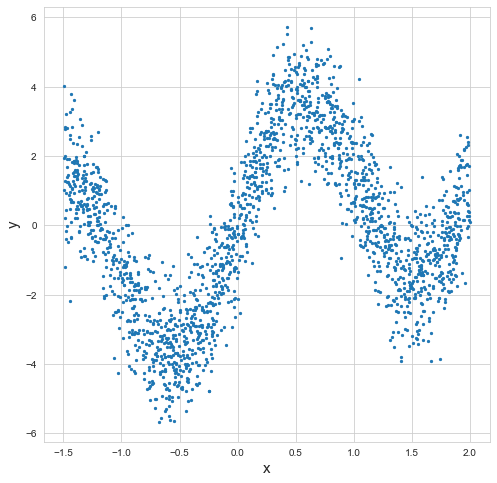

In [240]:
plt.scatter(X_glob, y_glob, s=5);
plt.xlabel("x", fontsize=15);
plt.ylabel("y", fontsize=15);

Посмотрим, как выглядят значения bias-variance компонент для некоторых семейств алгоритмов в зависимости от некоторых параметров

In [241]:
# Напишем вспомогательную функцию
from typing import Callable, Tuple

def get_bias_variance(X_glob: np.ndarray, y_glob: np.ndarray, model: Callable, n_models: int=100, 
                      visualise: bool=True, subsample_size: int=600) -> Tuple[float]:
    
    x_dom = np.linspace(np.min(X_glob), np.max(X_glob), 500)
    
    all_predictions = []
    for experiment_number in range(n_models):
        subsample_idxs = np.random.randint(len(X_glob), size=subsample_size)
        X_sub, y_sub = X_glob[subsample_idxs], y_glob[subsample_idxs]
        current_model = model.fit(X=X_sub.reshape(-1, 1), y=y_sub)
        current_predictions = current_model.predict(x_dom.reshape(-1, 1)).ravel()
        all_predictions.append(current_predictions)
        if visualise:
            plt.plot(x_dom, current_predictions, color='black', linewidth=0.5)
        
    all_predictions = np.array(all_predictions)
    mean_predictions = np.mean(all_predictions, axis=0)
        
    bias = np.mean((mean_predictions - 3*np.sin(3*x_dom) - x_dom)**2)
    variance = np.mean((all_predictions - mean_predictions)**2)
    
    if visualise:
        plt.title(f'Bias={round(bias, 3)}, variance={round(variance, 3)}', fontsize=15);
        plt.plot(x_dom, mean_predictions, color='red', linewidth=1.5, label='mean model')
        plt.scatter(X_glob, y_glob, s=5, color='dodgerblue')
        plt.legend(fontsize=15);
        plt.show();
        
    return bias, variance

<a id='contents'></a>
Эксперименты по определению зависимости BVD компонент от параметров алгоритма:

- [Ридж регрессия](#ridge)
- [Дерево](#tree)
- [SVM](#svm)
- [Полиномиальная регрессия](#poly)

In [242]:
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor

<a id='ridge'></a>
### Ридж

[К выбору алгоритма](#contents)

reg_coef: 0.001


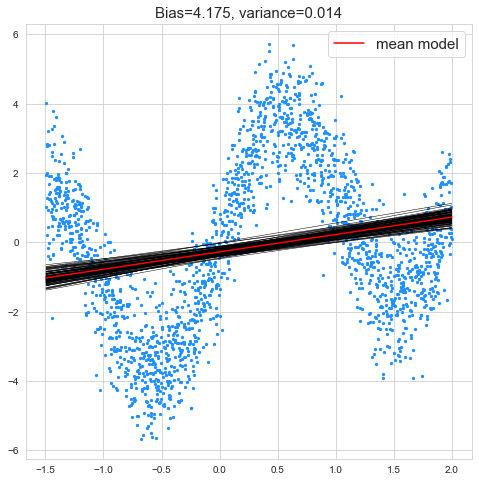

reg_coef: 0.1


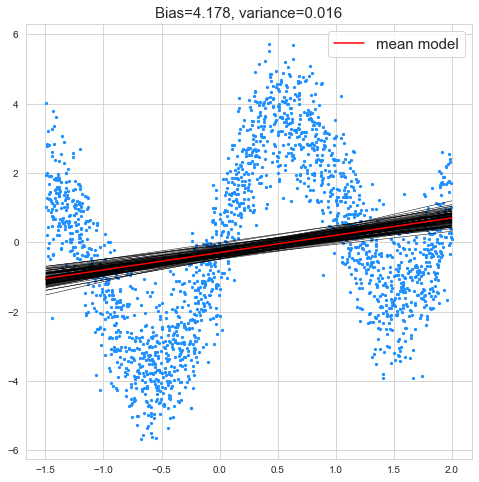

reg_coef: 10.0


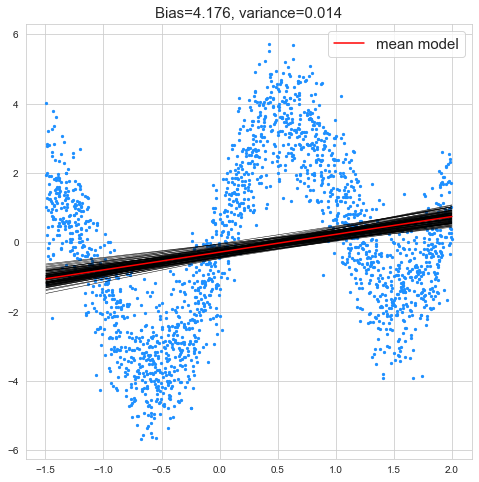

reg_coef: 1000.0


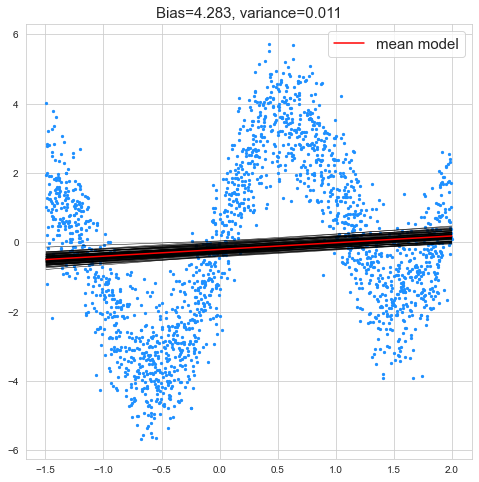

reg_coef: 100000.0


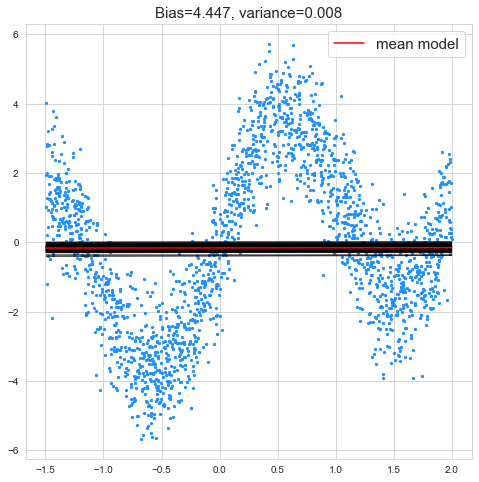

In [243]:
param_list = []
bias_list, variance_list = [], []
for reg_coef in 10**np.linspace(-3, 5, 5):
    print('reg_coef:', reg_coef)
    param_list.append(reg_coef)
    bias, variance = get_bias_variance(X_glob=X_glob, y_glob=y_glob, model=Ridge(alpha=reg_coef))
    bias_list.append(bias)
    variance_list.append(variance)

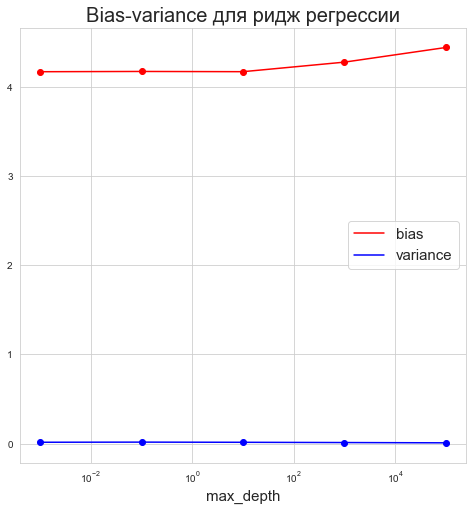

In [244]:
plt.title(f'Bias-variance для ридж регрессии', fontsize=20);
plt.plot(param_list, bias_list, color='red', label='bias')
plt.scatter(param_list, bias_list, color='red');
plt.plot(param_list, variance_list, color='blue', label='variance')
plt.scatter(param_list, variance_list, color='blue');
plt.xscale('log')
plt.xlabel('max_depth', fontsize=15);
plt.legend(fontsize=15);

<a id='tree'></a>
### Дерево

[К выбору алгоритма](#contents)

max_depth: 1


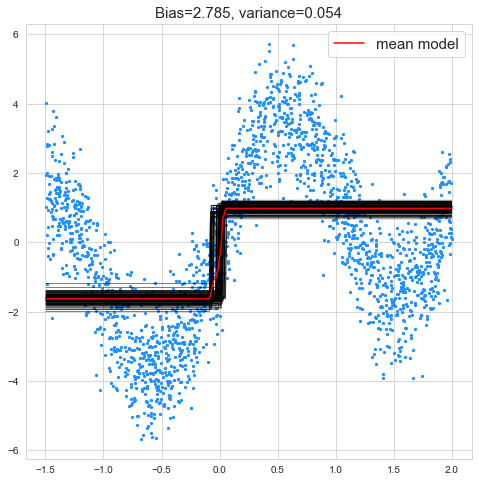

max_depth: 2


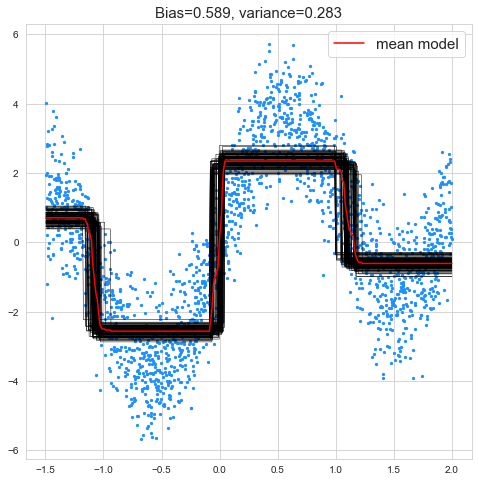

max_depth: 3


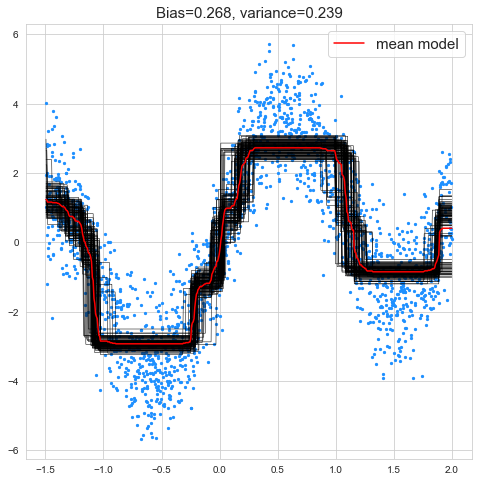

max_depth: 4


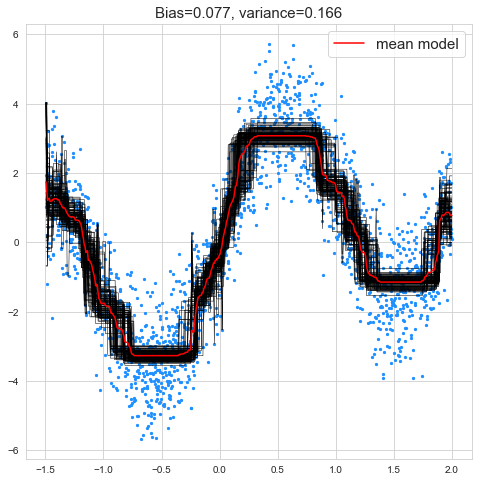

max_depth: 5


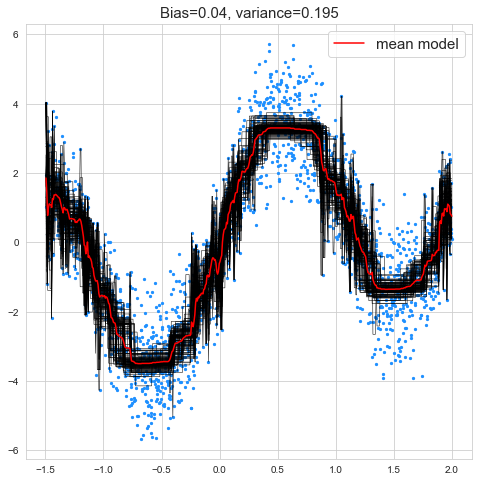

max_depth: 6


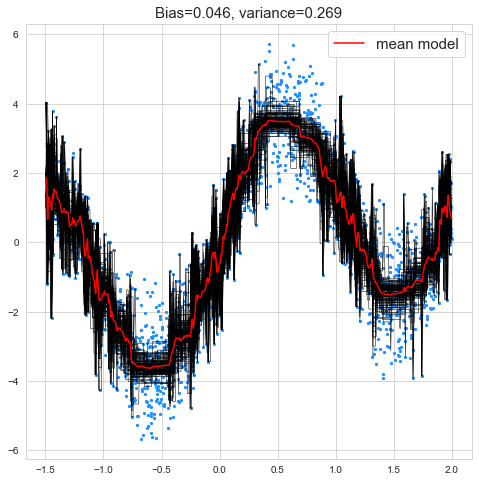

max_depth: 7


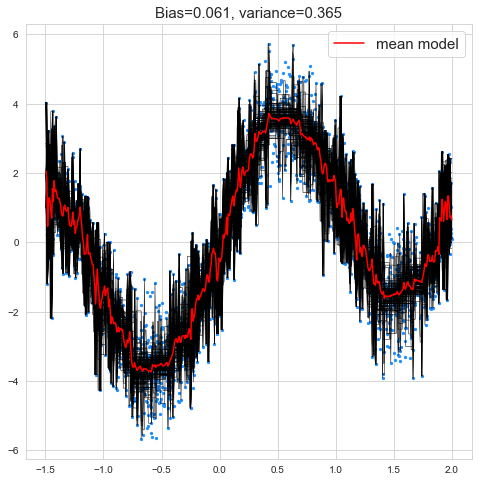

max_depth: 8


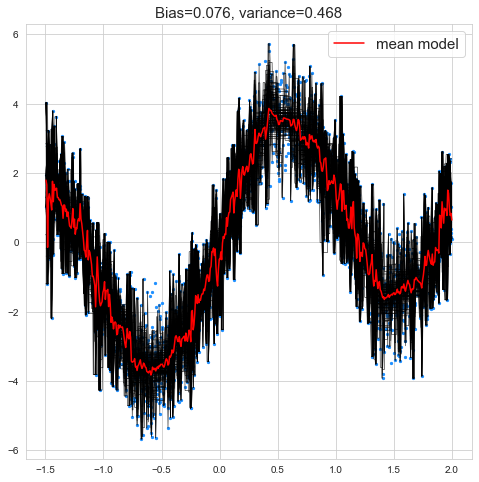

max_depth: 9


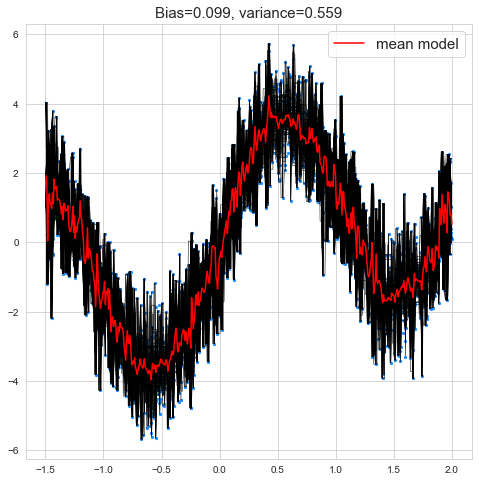

max_depth: 10


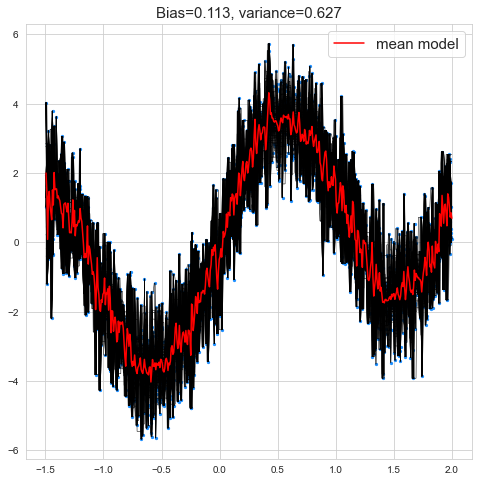

max_depth: 11


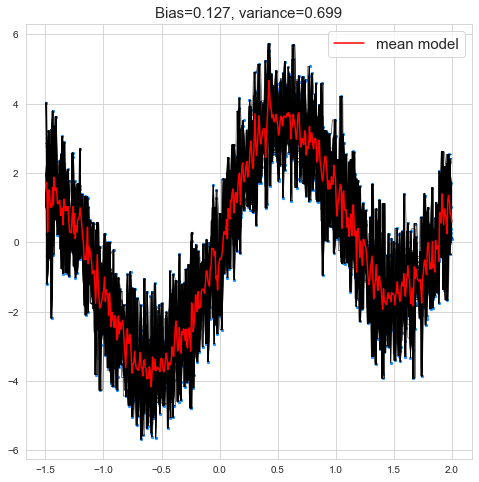

max_depth: 12


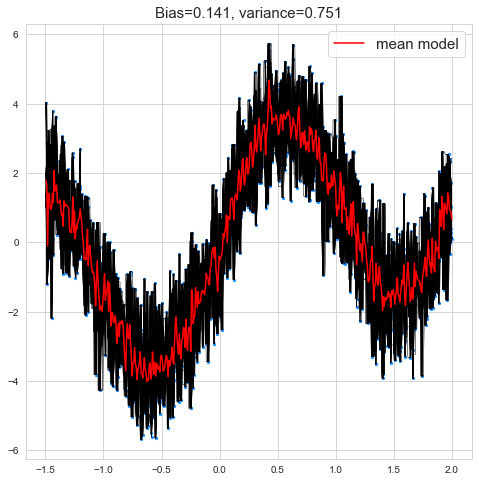

max_depth: 13


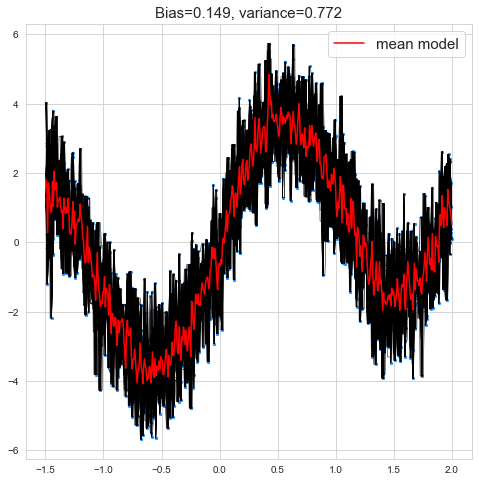

In [245]:
param_list = []
bias_list, variance_list = [], []
for depth in range(1, 14):
    print('max_depth:', depth)
    param_list.append(depth)
    bias, variance = get_bias_variance(X_glob=X_glob, y_glob=y_glob, model=DecisionTreeRegressor(max_depth=depth))
    bias_list.append(bias)
    variance_list.append(variance)

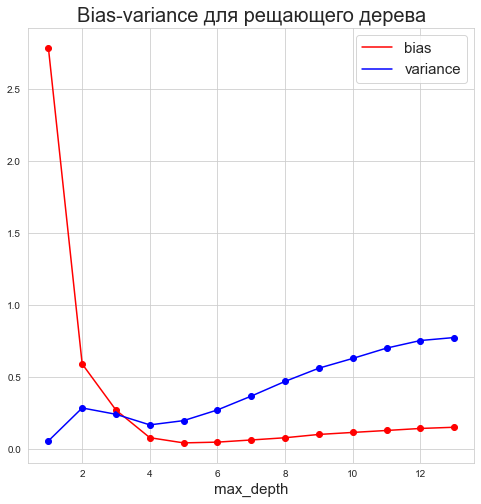

In [246]:
plt.title(f'Bias-variance для рещающего дерева', fontsize=20);
plt.plot(param_list, bias_list, color='red', label='bias')
plt.scatter(param_list, bias_list, color='red');
plt.plot(param_list, variance_list, color='blue', label='variance')
plt.scatter(param_list, variance_list, color='blue');
plt.xlabel('max_depth', fontsize=15);
plt.legend(fontsize=15);

min_samples_leaf: 1


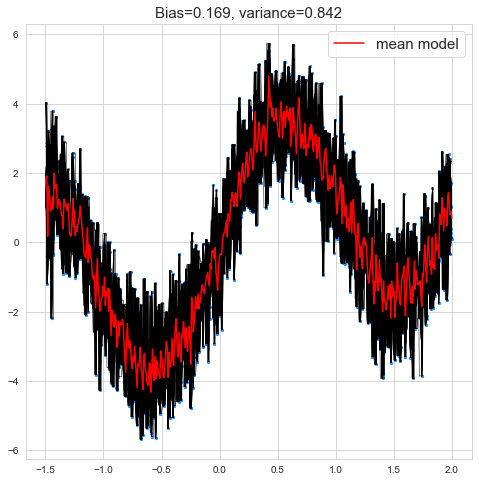

min_samples_leaf: 6


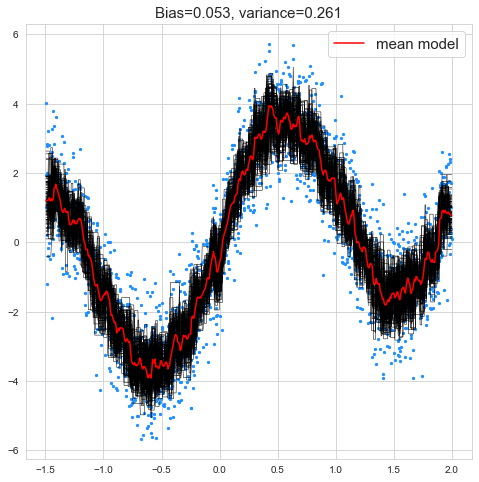

min_samples_leaf: 11


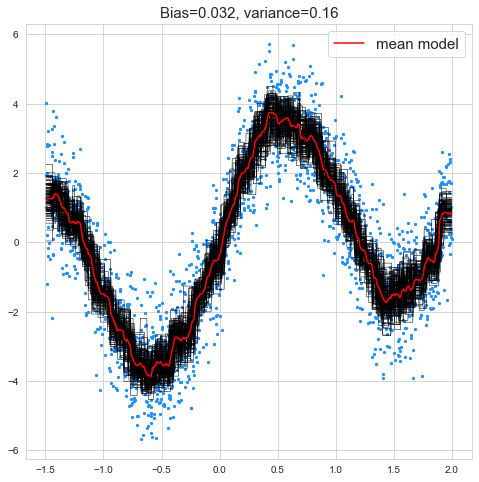

min_samples_leaf: 16


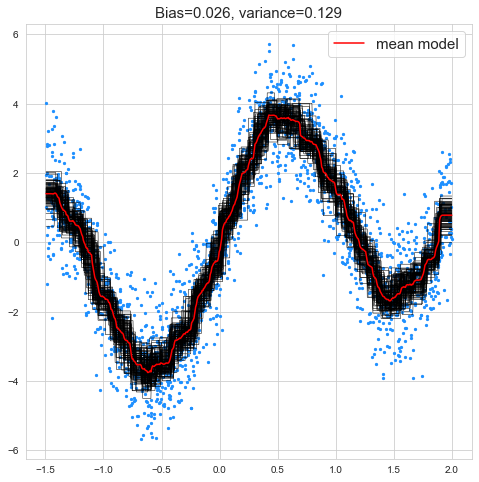

min_samples_leaf: 21


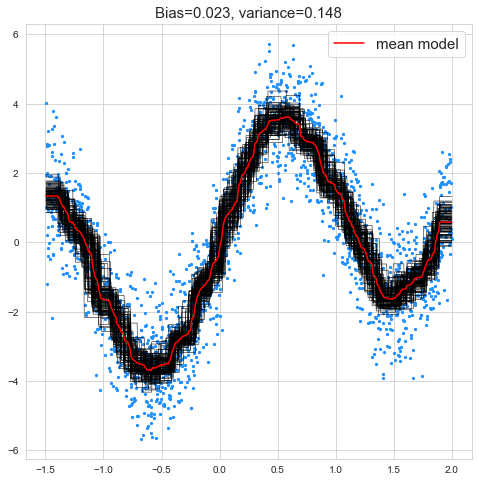

min_samples_leaf: 26


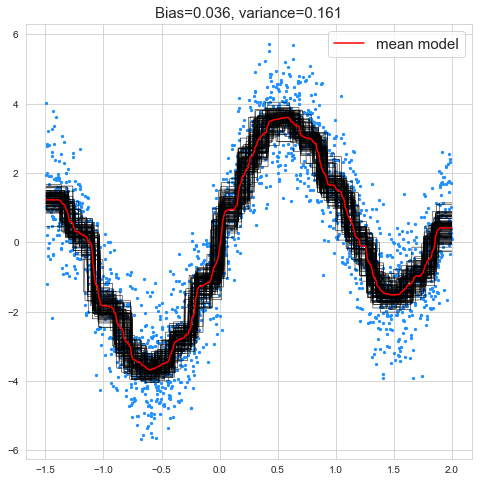

min_samples_leaf: 31


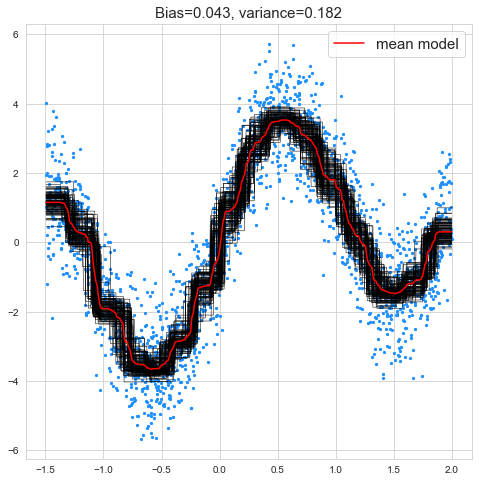

min_samples_leaf: 36


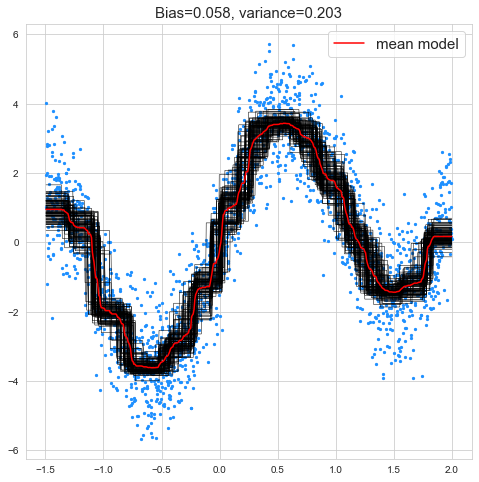

min_samples_leaf: 41


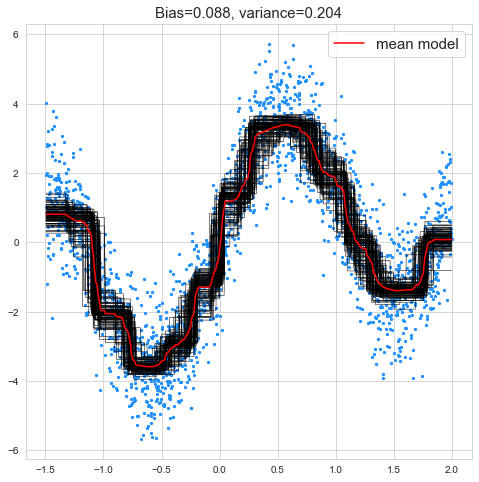

min_samples_leaf: 46


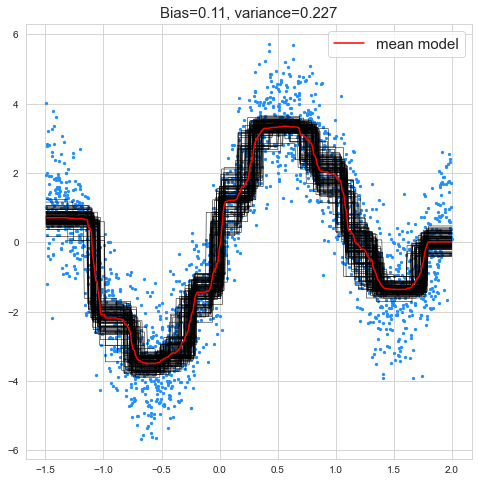

In [247]:
param_list = []
bias_list, variance_list = [], []
for min_samples_leaf in range(1, 50, 5):
    print('min_samples_leaf:', min_samples_leaf)
    param_list.append(min_samples_leaf)
    bias, variance = get_bias_variance(X_glob=X_glob, y_glob=y_glob, 
                                       model=DecisionTreeRegressor(min_samples_leaf=min_samples_leaf))
    bias_list.append(bias)
    variance_list.append(variance)

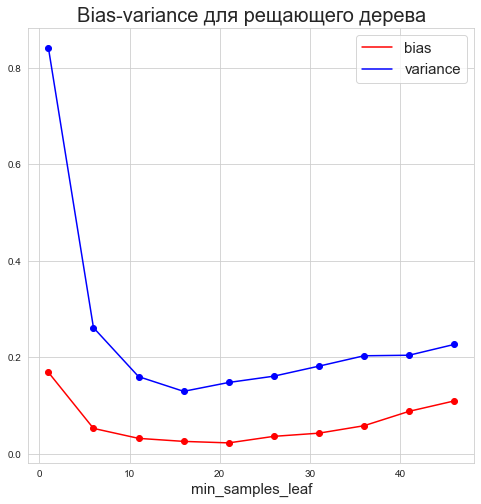

In [248]:
plt.title(f'Bias-variance для рещающего дерева', fontsize=20);
plt.plot(param_list, bias_list, color='red', label='bias')
plt.scatter(param_list, bias_list, color='red');
plt.plot(param_list, variance_list, color='blue', label='variance')
plt.scatter(param_list, variance_list, color='blue');
plt.xlabel('min_samples_leaf', fontsize=15);
plt.legend(fontsize=15);

<a id='svm'></a>
### SVM (с ядром)

[К выбору алгоритма](#contents)

In [249]:
from sklearn.svm import SVR

gamma: 0.0001


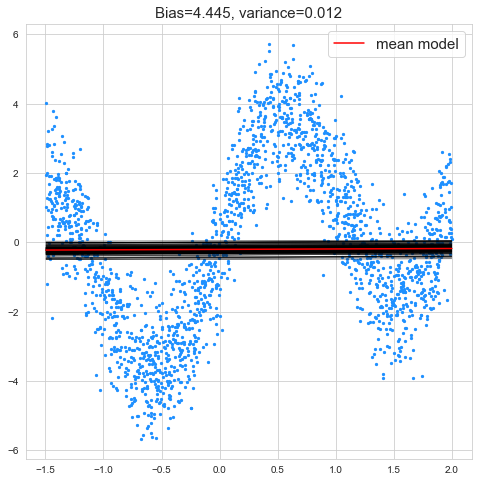

gamma: 0.00026366508987303583


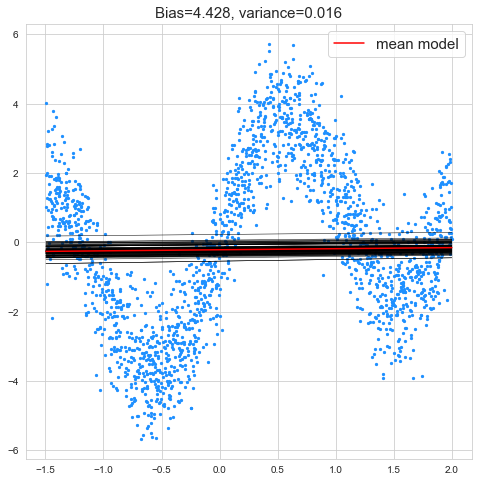

gamma: 0.0006951927961775605


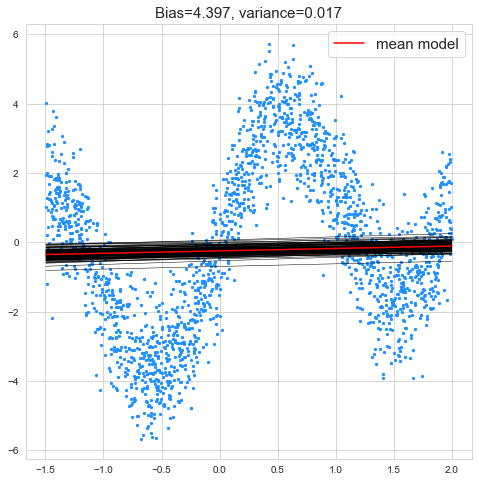

gamma: 0.0018329807108324356


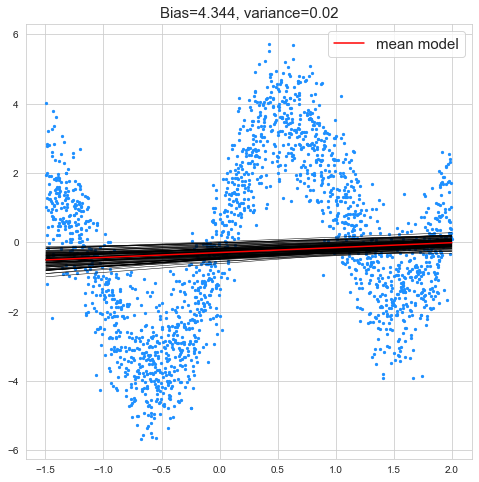

gamma: 0.004832930238571752


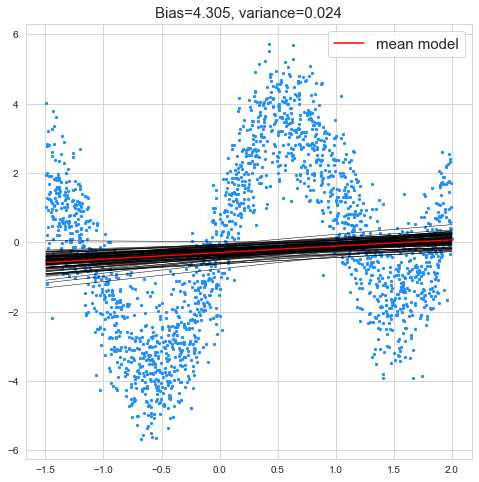

gamma: 0.012742749857031334


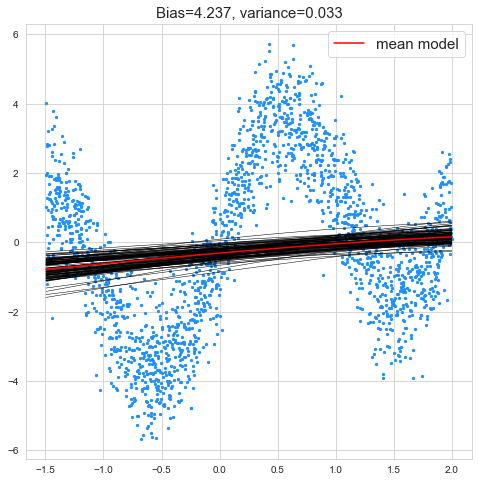

gamma: 0.03359818286283781


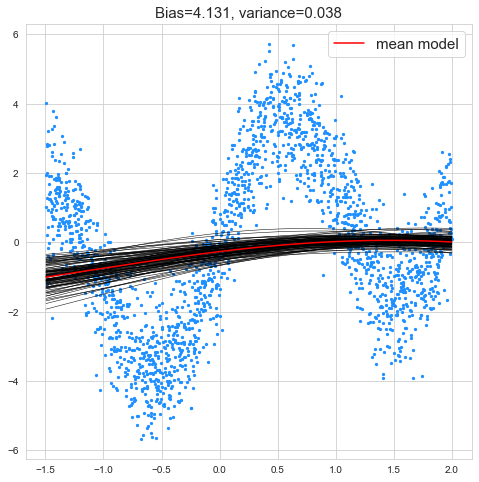

gamma: 0.08858667904100823


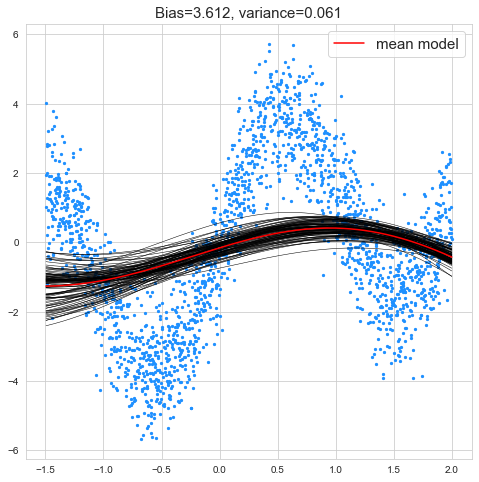

gamma: 0.23357214690901212


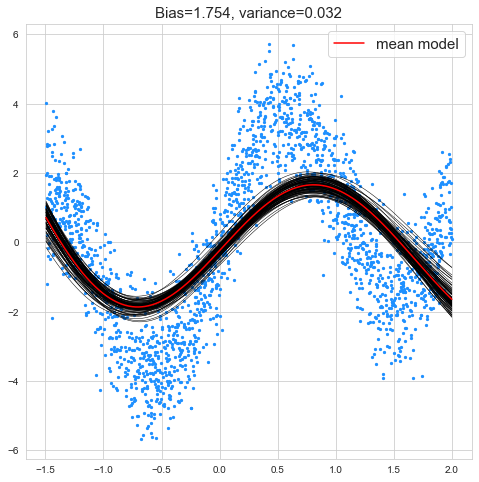

gamma: 0.615848211066026


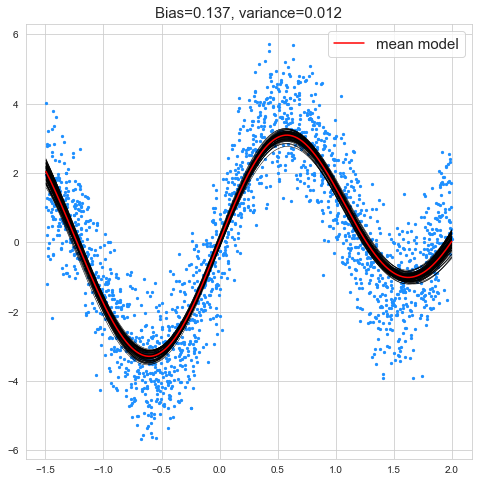

gamma: 1.623776739188721


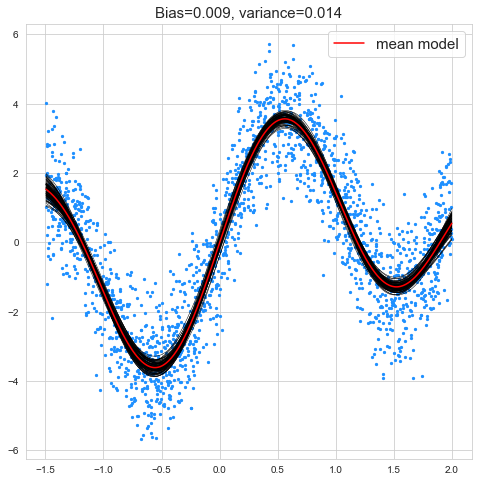

gamma: 4.281332398719396


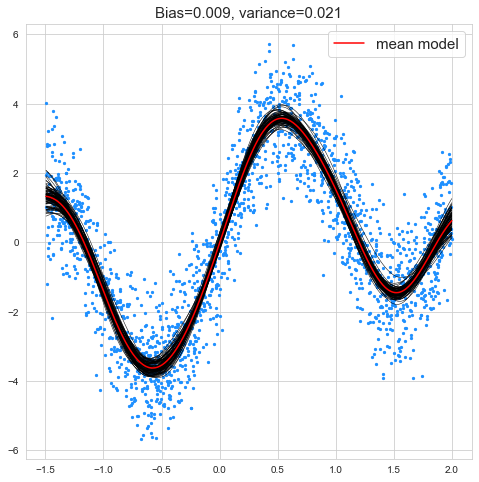

gamma: 11.288378916846883


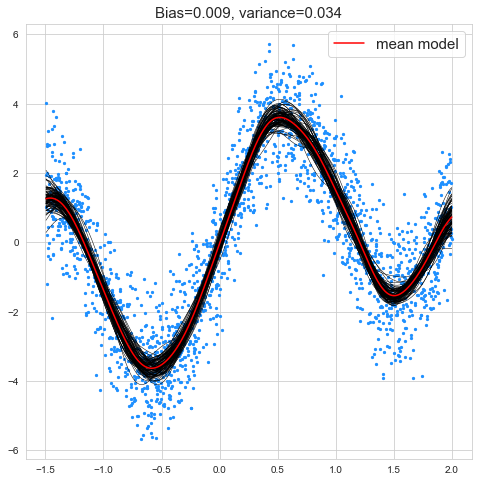

gamma: 29.763514416313132


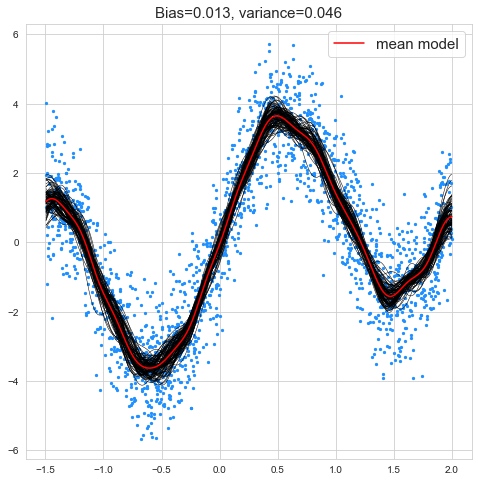

gamma: 78.47599703514607


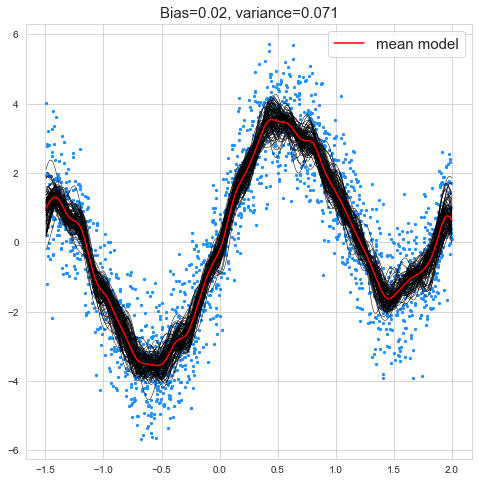

gamma: 206.913808111479


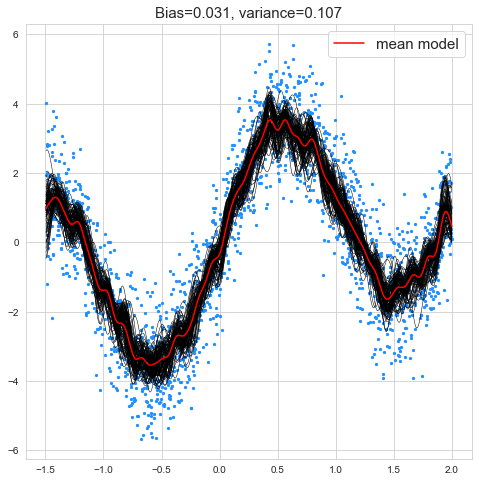

gamma: 545.5594781168514


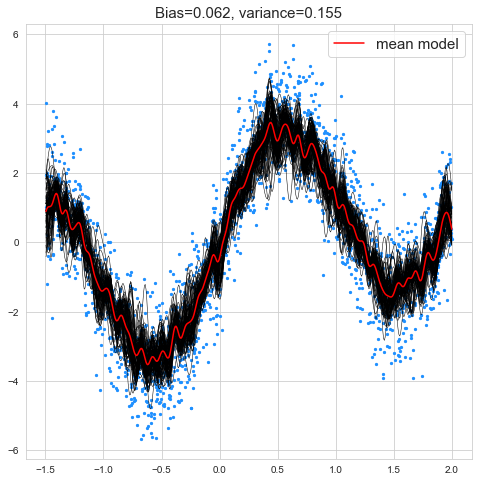

gamma: 1438.44988828766


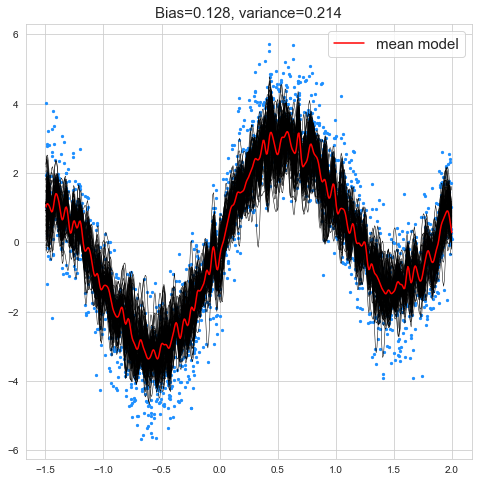

gamma: 3792.690190732246


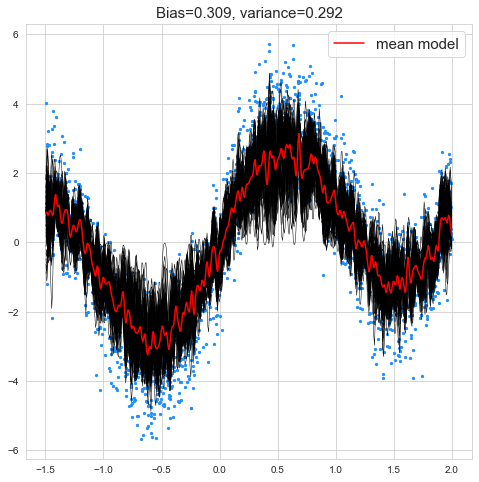

gamma: 10000.0


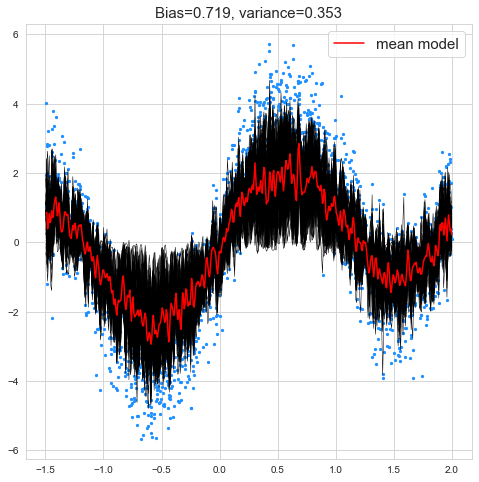

In [250]:
param_list = []
bias_list, variance_list = [], []
for gamma in 10**np.linspace(-4, 4, 20):
    print('gamma:', gamma)
    param_list.append(gamma)
    bias, variance = get_bias_variance(X_glob=X_glob, y_glob=y_glob, 
                                       model=SVR(kernel='rbf', gamma=gamma))
    bias_list.append(bias)
    variance_list.append(variance)

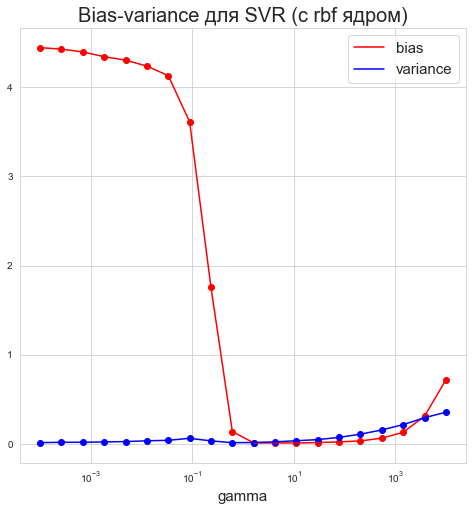

In [251]:
plt.title(f'Bias-variance для SVR (c rbf ядром)', fontsize=20);
plt.plot(param_list, bias_list, color='red', label='bias')
plt.scatter(param_list, bias_list, color='red');
plt.plot(param_list, variance_list, color='blue', label='variance')
plt.scatter(param_list, variance_list, color='blue');
plt.xlabel('gamma', fontsize=15);
plt.xscale('log')
plt.legend(fontsize=15);

<a id='poly'></a>
### Полиномиальная регрессия

[К выбору алгоритма](#contents)

In [252]:
class PolyReg():
    
    def __init__(self, deg: int=1):
        self.coefs = None
        self.deg = deg
    
    def fit(self, X, y):
        self.coefs = np.polyfit(x=X.ravel(), y=y.ravel(), deg=self.deg)
        return self
        
    def predict(self, X):
        pred = [self.coefs[self.deg - i]*np.power(X.ravel(), i) for i in range(self.deg+1)]
        return np.sum(pred, axis=0)

degree: 1


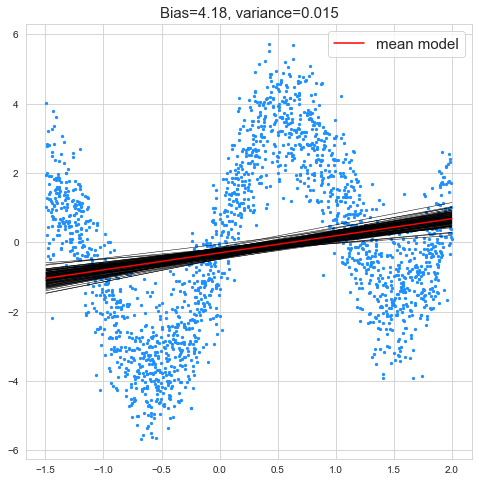

degree: 2


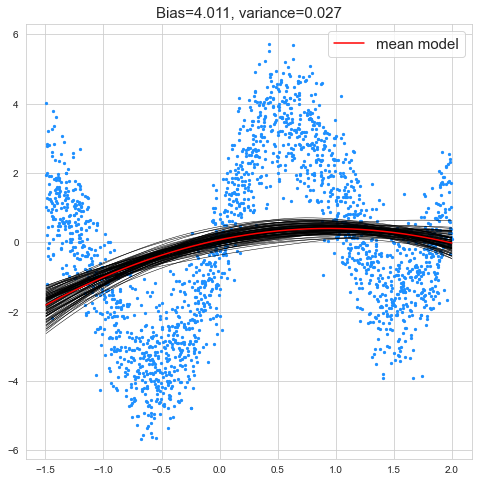

degree: 3


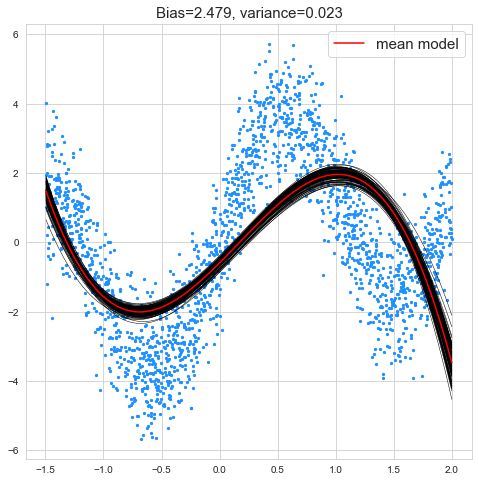

degree: 4


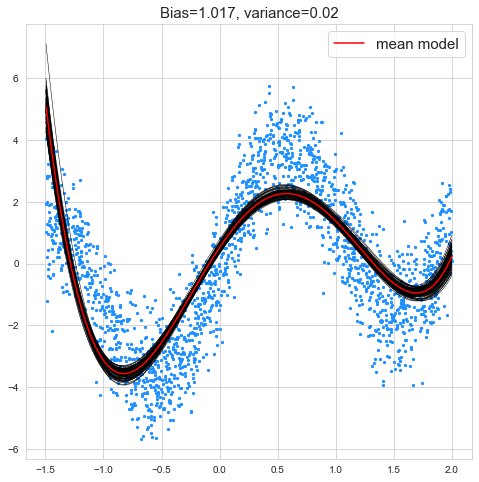

degree: 5


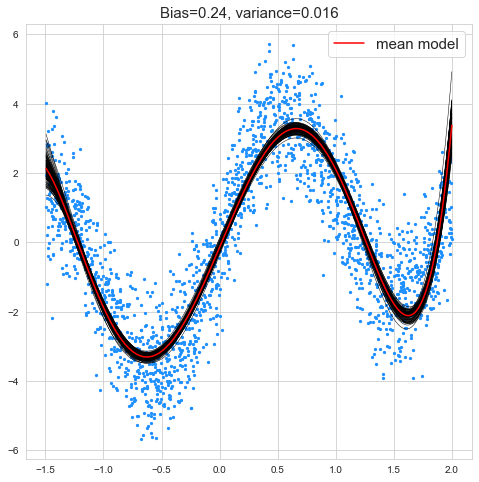

degree: 6


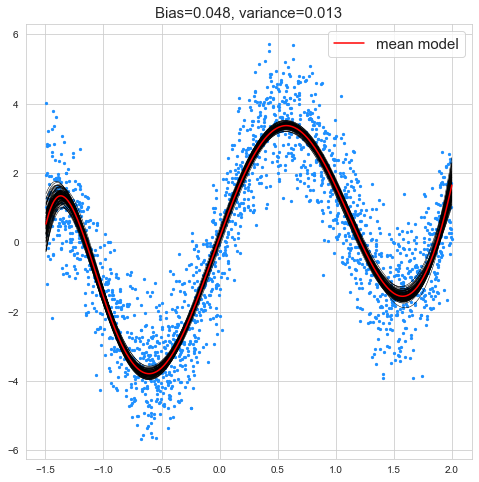

degree: 7


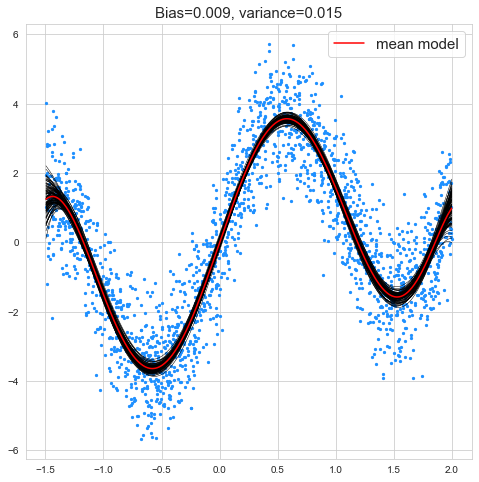

degree: 8


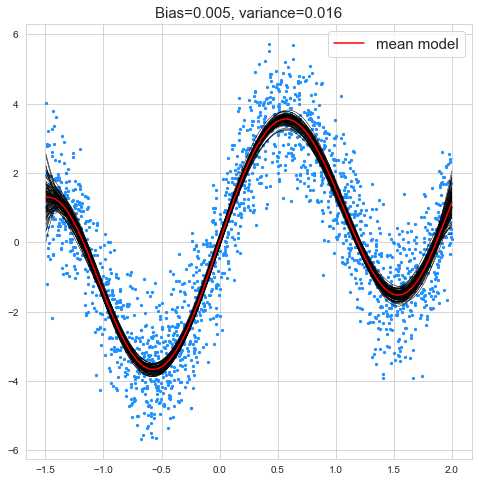

degree: 9


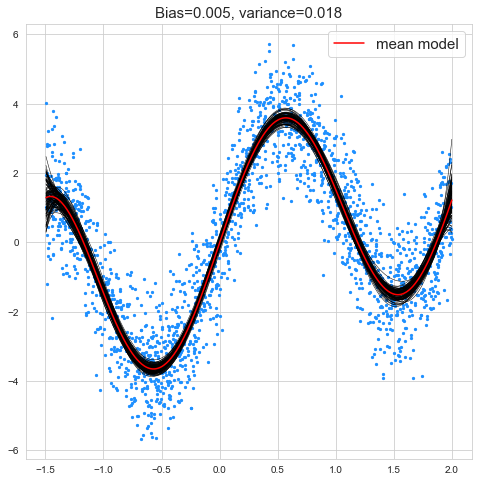

In [253]:
param_list = []
bias_list, variance_list = [], []
for deg in range(1, 10):
    print('degree:', deg)
    param_list.append(deg)
    bias, variance = get_bias_variance(X_glob=X_glob, y_glob=y_glob, 
                                       model=PolyReg(deg=deg))
    bias_list.append(bias)
    variance_list.append(variance)

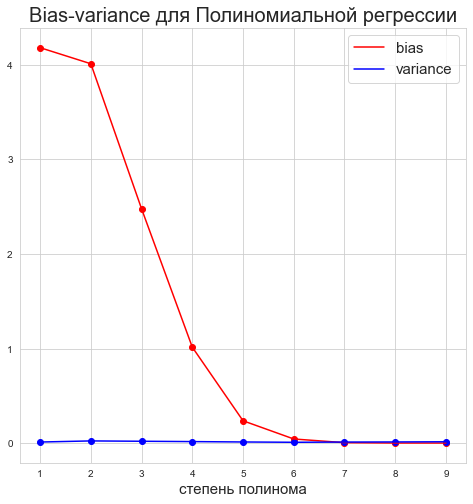

In [254]:
plt.title(f'Bias-variance для Полиномиальной регрессии', fontsize=20);
plt.plot(param_list, bias_list, color='red', label='bias')
plt.scatter(param_list, bias_list, color='red');
plt.plot(param_list, variance_list, color='blue', label='variance')
plt.scatter(param_list, variance_list, color='blue');
plt.xlabel('степень полинома', fontsize=15);
plt.legend(fontsize=15);